# Audio Classification Data Preprocessing with Observation

In [5]:
import os
os.chdir('C:/Users/Asus/OneDrive/Desktop/DE/2B/Urban_Dataset_8k')

In [6]:
#Reading the Sample audio using LIBROSA
import librosa
audio_file_path='UrbanSound8k/Street_Music_1.wav'
librosa_audio_data, librosa_sample_rate=librosa.load(audio_file_path)

In [7]:
print(librosa_audio_data)

[-0.02157087 -0.016578   -0.00734324 ... -0.03113592 -0.02928013
 -0.02008172]


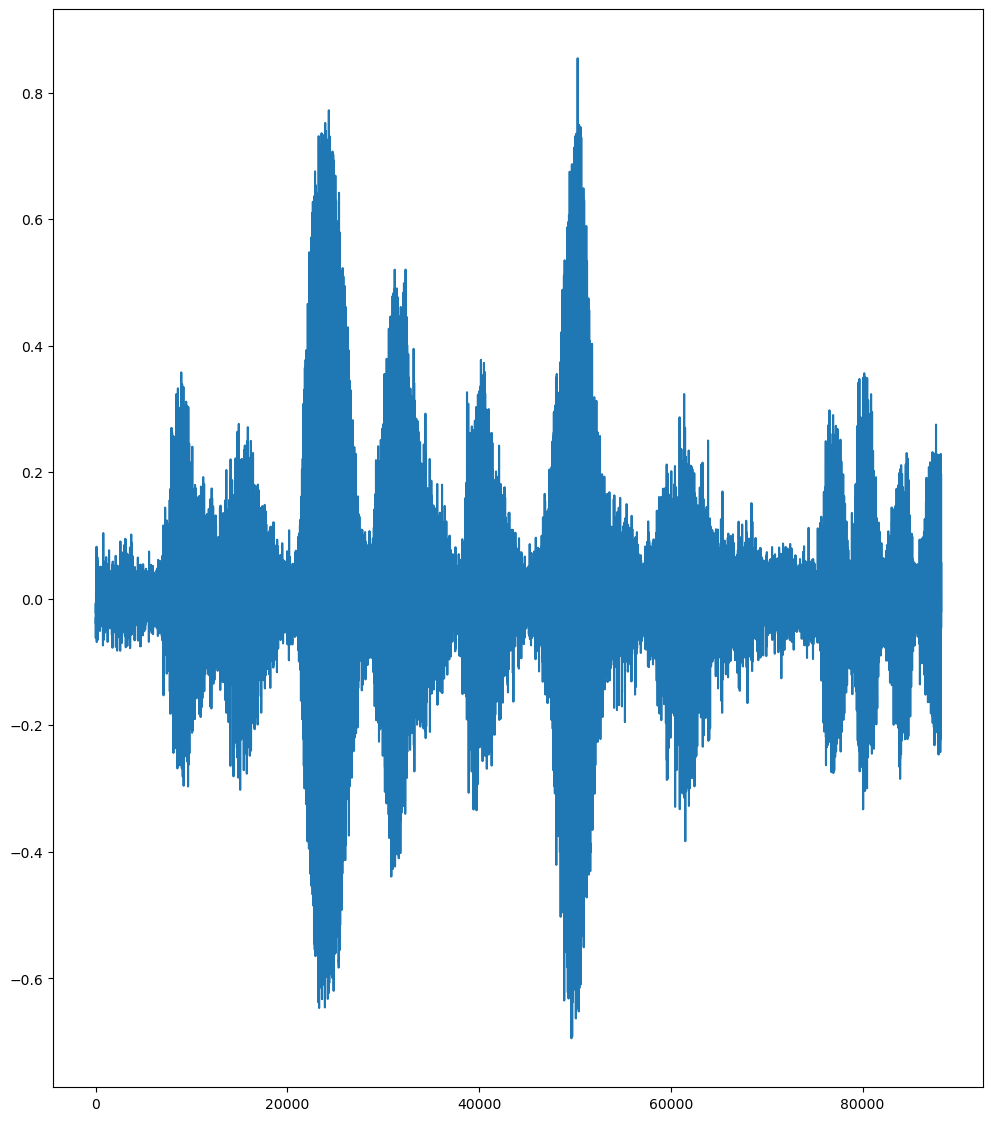

In [8]:
#Plotting the Mono Channel Normalised Values
import matplotlib.pyplot as plt
#OG Audio with 1 Channel Only(Mono)
plt.figure(figsize=(12,14))
plt.plot(librosa_audio_data)

***
## Observation

In [9]:
## Let's Try with Scipy
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path)

In [10]:
wave_audio

array([[ -968, -1069],
       [ -838,  -636],
       [ -571,  -312],
       ...,
       [ -774,  -633],
       [ -641,  -491],
       [ -712,  -801]], dtype=int16)

In [11]:
# Plotting with 2 channels
import matplotlib.pyplot as plt

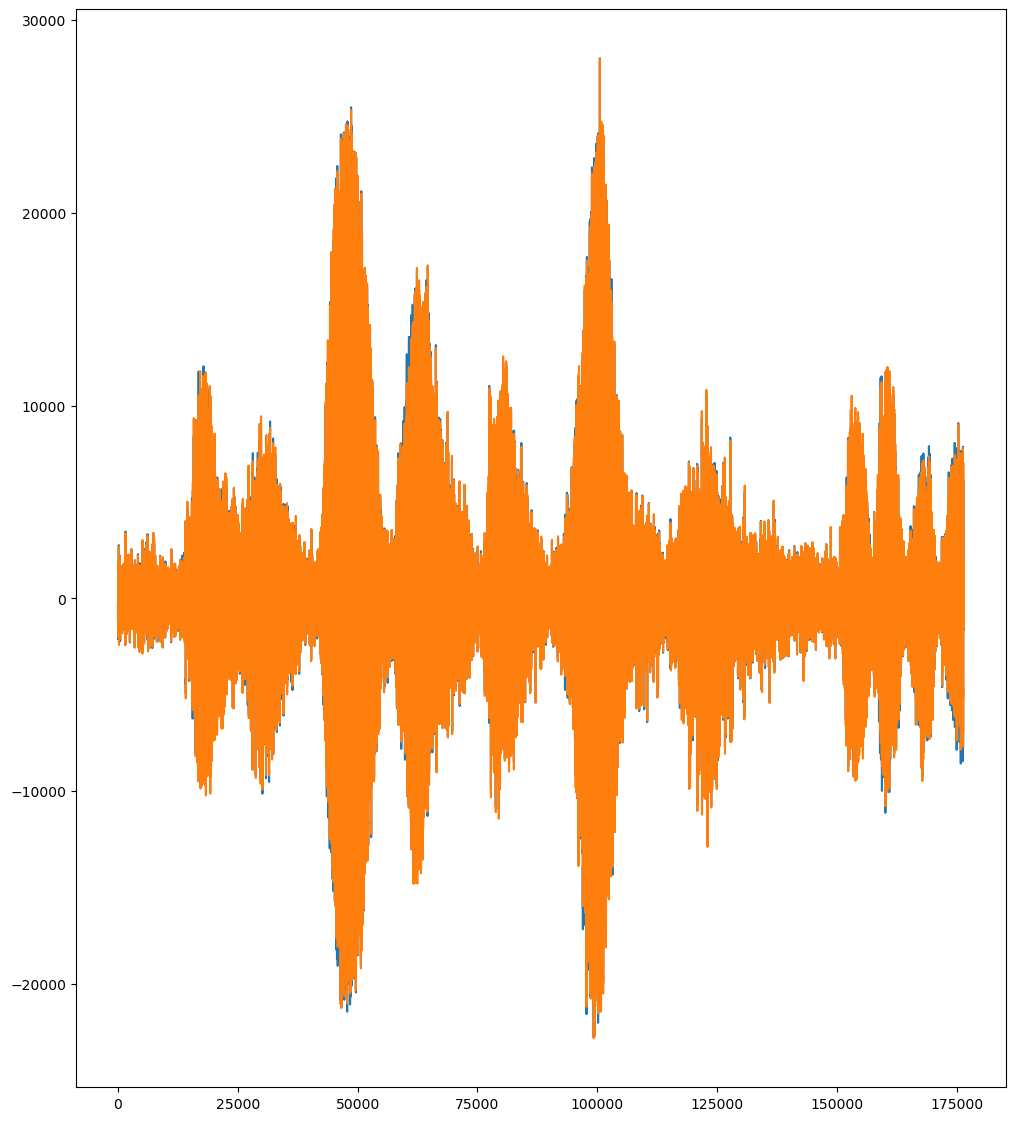

In [12]:
#Original Audio with 2 Channels (Stereo)
plt.figure(figsize=(12,14))
plt.plot(wave_audio)

***
## Extracting Features using MFCC 

Here we will be using Mel-Frequency Cepstral Coeeficients ( MFCC) from the audio samples.
It basically summaries the frequency distribution across the window size, possible to analyze time and frequency distribution characteristics of the sound. 

In [13]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr = librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 173)


In [14]:
mfccs

array([[-258.57013  , -231.50067  , -236.65173  , ..., -153.42421  ,
        -143.7371   , -148.23544  ],
       [ 121.01886  ,  112.10115  ,  105.15094  , ...,   89.769775 ,
          84.26489  ,   98.70123  ],
       [  -9.771168 ,  -13.68157  ,  -17.375484 , ...,  -60.303963 ,
         -58.285202 ,  -55.053535 ],
       ...,
       [   4.4577804,    3.894292 ,    3.8313546, ...,   12.842535 ,
          14.705294 ,   13.911017 ],
       [   6.7969103,    2.161312 ,    2.0384355, ...,   10.529806 ,
          14.516345 ,   16.218838 ],
       [   3.2938156,    1.0724316,    2.8524914, ...,   13.445023 ,
           9.4535885,   10.246318 ]], dtype=float32)

In [15]:
## Extracting MFCC's for every audio file
import pandas as pd
import os
import librosa

audio_dataset_path='UrbanSound8K/audio/'
metadata=pd.read_csv('UrbanSound8k/metadata/UrbanSound8K.csv')
metadata.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


In [16]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [17]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data = features_extractor(file_name)
    extracted_features.append([data,final_class_labels])
    

3555it [10:17, 12.18it/s]C:\Users\Asus\AppData\Roaming\Python\Python310\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
8325it [26:45,  7.31it/s]C:\Users\Asus\AppData\Roaming\Python\Python310\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
8327it [26:45,  9.77it/s]C:\Users\Asus\AppData\Roaming\Python\Python310\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
8732it [27:44,  5.25it/s]


In [18]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head(10)

,feature,class
0,"[-217.35526, 70.22338, -130.38527, -53.282898,...",dog_bark
1,"[-424.09818, 109.34077, -52.919525, 60.86475, ...",children_playing
2,"[-458.79114, 121.38419, -46.520657, 52.00812, ...",children_playing
3,"[-413.89984, 101.66373, -35.42945, 53.036358, ...",children_playing
4,"[-446.60352, 113.68541, -52.402206, 60.302044,...",children_playing
5,"[-446.8255, 117.01193, -33.7923, 55.406204, 2....",children_playing
6,"[-476.60767, 119.41842, -28.514036, 55.966988,...",children_playing
7,"[-464.08258, 116.31008, -28.82692, 49.44204, -...",children_playing
8,"[-471.3208, 125.25887, -36.935383, 57.428547, ...",children_playing
9,"[-196.822, 113.993126, -13.813408, 0.4022098, ...",car_horn


In [19]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [20]:
X.shape

(8732, 40)

In [21]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [22]:
### Label Encoding
##y=np.array(pd.get_dummies(y))
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [23]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [24]:
y.shape

(8732, 10)

In [25]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [26]:
X_train

array([[-1.31104706e+02,  1.12505905e+02, -2.25746956e+01, ...,
         3.24665260e+00, -1.36902368e+00,  2.75575471e+00],
       [-1.36703424e+01,  9.10850830e+01, -7.79273319e+00, ...,
        -3.25305080e+00, -5.27745247e+00, -1.55697155e+00],
       [-4.98715439e+01,  2.65352994e-01, -2.05009365e+01, ...,
         2.85459471e+00, -1.60920465e+00,  3.52480578e+00],
       ...,
       [-4.27012360e+02,  9.26230469e+01,  3.12939739e+00, ...,
         7.42641389e-01,  7.33490825e-01,  7.11009145e-01],
       [-1.45754608e+02,  1.36265778e+02, -3.35155220e+01, ...,
         1.46811938e+00, -2.00917006e+00, -8.82181883e-01],
       [-4.21031342e+02,  2.10654541e+02,  3.49066067e+00, ...,
        -5.38886690e+00, -3.37136054e+00, -1.56651151e+00]], dtype=float32)

In [27]:
X_train.shape

(6985, 40)

In [28]:
X_test.shape

(1747, 40)

In [29]:
y_train.shape

(6985, 10)

In [30]:
y_test.shape

(1747, 10)

***
## Model Creation

In [31]:
import tensorflow as tf
print(tf.__version__)

2.10.0


In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [33]:
### No of classes
num_labels=y.shape[1]

In [59]:
model=Sequential()
###first layer
model.add(Dense(200,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.3))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.3))
###third layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.3))
###fourth layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.3))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [60]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 200)               8200      
                                                                 
 activation_20 (Activation)  (None, 200)               0         
                                                                 
 dropout_15 (Dropout)        (None, 200)               0         
                                                                 
 dense_21 (Dense)            (None, 200)               40200     
                                                                 
 activation_21 (Activation)  (None, 200)               0         
                                                                 
 dropout_16 (Dropout)        (None, 200)               0         
                                                                 
 dense_22 (Dense)            (None, 200)              

In [64]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [65]:
## Traning my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 200
num_batch_size = 64

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/200
104/110 [===========================>..] - ETA: 0s - loss: 0.6811 - accuracy: 0.7882
Epoch 1: val_loss improved from inf to 0.55257, saving model to saved_models\audio_classification.hdf5
110/110 [==============================] - 3s 14ms/step - loss: 0.6864 - accuracy: 0.7861 - val_loss: 0.5526 - val_accuracy: 0.8443
Epoch 2/200
109/110 [============================>.] - ETA: 0s - loss: 0.6786 - accuracy: 0.7929
Epoch 2: val_loss did not improve from 0.55257
110/110 [==============================] - 1s 11ms/step - loss: 0.6778 - accuracy: 0.7931 - val_loss: 0.5538 - val_accuracy: 0.8340
Epoch 3/200
108/110 [============================>.] - ETA: 0s - loss: 0.6748 - accuracy: 0.7925
Epoch 3: val_loss did not improve from 0.55257
110/110 [==============================] - 1s 10ms/step - loss: 0.6750 - accuracy: 0.7934 - val_loss: 0.5705 - val_accuracy: 0.8277
Epoch 4/200
105/110 [===========================>..] - ETA: 0s - loss: 0.6416 - accuracy: 0.7920
Epoch 4: val_loss i

Epoch 30/200
106/110 [===========================>..] - ETA: 0s - loss: 0.6247 - accuracy: 0.8054
Epoch 30: val_loss improved from 0.52700 to 0.51348, saving model to saved_models\audio_classification.hdf5
110/110 [==============================] - 2s 16ms/step - loss: 0.6227 - accuracy: 0.8059 - val_loss: 0.5135 - val_accuracy: 0.8523
Epoch 31/200
110/110 [==============================] - ETA: 0s - loss: 0.6134 - accuracy: 0.8036
Epoch 31: val_loss improved from 0.51348 to 0.50922, saving model to saved_models\audio_classification.hdf5
110/110 [==============================] - 2s 16ms/step - loss: 0.6134 - accuracy: 0.8036 - val_loss: 0.5092 - val_accuracy: 0.8529
Epoch 32/200
110/110 [==============================] - ETA: 0s - loss: 0.6105 - accuracy: 0.8019
Epoch 32: val_loss did not improve from 0.50922
110/110 [==============================] - 1s 13ms/step - loss: 0.6105 - accuracy: 0.8019 - val_loss: 0.5119 - val_accuracy: 0.8454
Epoch 33/200
105/110 [========================

109/110 [============================>.] - ETA: 0s - loss: 0.6256 - accuracy: 0.7985
Epoch 59: val_loss did not improve from 0.50922
110/110 [==============================] - 2s 14ms/step - loss: 0.6253 - accuracy: 0.7986 - val_loss: 0.5135 - val_accuracy: 0.8420
Epoch 60/200
110/110 [==============================] - ETA: 0s - loss: 0.6239 - accuracy: 0.8043
Epoch 60: val_loss did not improve from 0.50922
110/110 [==============================] - 2s 15ms/step - loss: 0.6239 - accuracy: 0.8043 - val_loss: 0.5233 - val_accuracy: 0.8414
Epoch 61/200
107/110 [============================>.] - ETA: 0s - loss: 0.6243 - accuracy: 0.8048
Epoch 61: val_loss did not improve from 0.50922
110/110 [==============================] - 2s 14ms/step - loss: 0.6238 - accuracy: 0.8056 - val_loss: 0.5187 - val_accuracy: 0.8460
Epoch 62/200
105/110 [===========================>..] - ETA: 0s - loss: 0.6232 - accuracy: 0.8028
Epoch 62: val_loss did not improve from 0.50922
110/110 [========================

109/110 [============================>.] - ETA: 0s - loss: 0.6024 - accuracy: 0.8085
Epoch 88: val_loss did not improve from 0.49603
110/110 [==============================] - 1s 13ms/step - loss: 0.6018 - accuracy: 0.8086 - val_loss: 0.5177 - val_accuracy: 0.8454
Epoch 89/200
109/110 [============================>.] - ETA: 0s - loss: 0.6363 - accuracy: 0.8016
Epoch 89: val_loss did not improve from 0.49603
110/110 [==============================] - 2s 14ms/step - loss: 0.6374 - accuracy: 0.8013 - val_loss: 0.5121 - val_accuracy: 0.8558
Epoch 90/200
106/110 [===========================>..] - ETA: 0s - loss: 0.5987 - accuracy: 0.8121
Epoch 90: val_loss did not improve from 0.49603
110/110 [==============================] - 1s 13ms/step - loss: 0.5976 - accuracy: 0.8130 - val_loss: 0.5129 - val_accuracy: 0.8546
Epoch 91/200
110/110 [==============================] - ETA: 0s - loss: 0.5922 - accuracy: 0.8133
Epoch 91: val_loss did not improve from 0.49603
110/110 [========================

109/110 [============================>.] - ETA: 0s - loss: 0.6039 - accuracy: 0.8073
Epoch 117: val_loss did not improve from 0.48572
110/110 [==============================] - 1s 11ms/step - loss: 0.6037 - accuracy: 0.8073 - val_loss: 0.5010 - val_accuracy: 0.8558
Epoch 118/200
108/110 [============================>.] - ETA: 0s - loss: 0.6008 - accuracy: 0.8108
Epoch 118: val_loss did not improve from 0.48572
110/110 [==============================] - 1s 12ms/step - loss: 0.5998 - accuracy: 0.8110 - val_loss: 0.5105 - val_accuracy: 0.8586
Epoch 119/200
109/110 [============================>.] - ETA: 0s - loss: 0.6235 - accuracy: 0.8081
Epoch 119: val_loss did not improve from 0.48572
110/110 [==============================] - 1s 11ms/step - loss: 0.6239 - accuracy: 0.8080 - val_loss: 0.5012 - val_accuracy: 0.8575
Epoch 120/200
108/110 [============================>.] - ETA: 0s - loss: 0.5918 - accuracy: 0.8152
Epoch 120: val_loss did not improve from 0.48572
110/110 [=================

106/110 [===========================>..] - ETA: 0s - loss: 0.6097 - accuracy: 0.8121
Epoch 146: val_loss improved from 0.48572 to 0.47338, saving model to saved_models\audio_classification.hdf5
110/110 [==============================] - 2s 14ms/step - loss: 0.6052 - accuracy: 0.8133 - val_loss: 0.4734 - val_accuracy: 0.8563
Epoch 147/200
110/110 [==============================] - ETA: 0s - loss: 0.5760 - accuracy: 0.8157
Epoch 147: val_loss did not improve from 0.47338
110/110 [==============================] - 2s 14ms/step - loss: 0.5760 - accuracy: 0.8157 - val_loss: 0.4742 - val_accuracy: 0.8603
Epoch 148/200
108/110 [============================>.] - ETA: 0s - loss: 0.5738 - accuracy: 0.8207
Epoch 148: val_loss did not improve from 0.47338
110/110 [==============================] - 2s 14ms/step - loss: 0.5728 - accuracy: 0.8209 - val_loss: 0.4891 - val_accuracy: 0.8609
Epoch 149/200
107/110 [============================>.] - ETA: 0s - loss: 0.6072 - accuracy: 0.8061
Epoch 149: val_

107/110 [============================>.] - ETA: 0s - loss: 0.5736 - accuracy: 0.8169
Epoch 175: val_loss did not improve from 0.47338
110/110 [==============================] - 1s 12ms/step - loss: 0.5718 - accuracy: 0.8169 - val_loss: 0.5239 - val_accuracy: 0.8529
Epoch 176/200
106/110 [===========================>..] - ETA: 0s - loss: 0.6074 - accuracy: 0.8084
Epoch 176: val_loss did not improve from 0.47338
110/110 [==============================] - 1s 11ms/step - loss: 0.6093 - accuracy: 0.8087 - val_loss: 0.4934 - val_accuracy: 0.8523
Epoch 177/200
107/110 [============================>.] - ETA: 0s - loss: 0.6181 - accuracy: 0.8100
Epoch 177: val_loss did not improve from 0.47338
110/110 [==============================] - 1s 12ms/step - loss: 0.6171 - accuracy: 0.8103 - val_loss: 0.5048 - val_accuracy: 0.8517
Epoch 178/200
110/110 [==============================] - ETA: 0s - loss: 0.5870 - accuracy: 0.8153
Epoch 178: val_loss did not improve from 0.47338
110/110 [=================

In [66]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.854607880115509


***
## Test Some Test Audio DATA
<li>Preprocess the new audio data</li>
<li>Predict the Classes</li>
<li>Inverse Transform of Predicted Label</li>

In [34]:
filename="UrbanSound8K/Engine_Idling_1.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label=model.predict(mfccs_scaled_features)
print(predicted_label)
classes_x=np.argmax(predicted_label,axis=1)
prediction_class = labelencoder.inverse_transform(classes_x)
prediction_class

[-305.75473     159.90852      18.342306     36.196423     -0.68215275
   29.578466      7.9746227    24.092175      3.2174249    16.726072
   -7.889825     13.687371     -4.3034186    14.295509     -3.8211148
    7.210376     -6.6397157    -6.145899    -11.022495     -5.639041
   -4.3055997     6.0837708    -0.7824885     1.2824975    -2.9956481
   -4.8800316    -4.9694896     1.3351873    -0.9122417    -0.44618255
    2.4355829     2.0427284     0.82870007    2.7889862     8.685842
    4.018196      5.036937      4.270294      6.47647      -1.5217988 ]
[[-305.75473     159.90852      18.342306     36.196423     -0.68215275
    29.578466      7.9746227    24.092175      3.2174249    16.726072
    -7.889825     13.687371     -4.3034186    14.295509     -3.8211148
     7.210376     -6.6397157    -6.145899    -11.022495     -5.639041
    -4.3055997     6.0837708    -0.7824885     1.2824975    -2.9956481
    -4.8800316    -4.9694896     1.3351873    -0.9122417    -0.44618255
     2.435582

array(['engine_idling'], dtype='<U16')

In [35]:
filename="UrbanSound8K/Street_Music_1.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label=model.predict(mfccs_scaled_features)
print(predicted_label)
classes_x=np.argmax(predicted_label,axis=1)
prediction_class = labelencoder.inverse_transform(classes_x)
prediction_class

[-1.8300687e+02  1.0975348e+02 -3.5528660e+01  1.2327786e+01
 -2.3497271e+01 -1.6108852e+01 -3.2264999e+01 -2.0230307e+01
 -3.4261806e+01 -1.5307649e+01 -2.3401793e+01 -1.2689436e+01
 -1.7051756e+01 -1.6616312e+01 -2.0951988e+01 -1.2574947e+01
 -1.6249893e+01 -7.3264709e+00 -7.6821966e+00 -5.1587753e+00
 -8.3706350e+00 -4.6302371e+00 -9.6386051e+00 -6.0577760e+00
 -2.9455044e+00 -2.7598648e+00 -4.7066846e+00 -4.4609475e+00
  2.9877525e-02  3.0278826e-01  4.0141120e+00  6.9358820e-01
 -2.0645621e+00 -4.2615967e+00  7.1303779e-01  1.3618959e+00
  6.1703795e-01 -4.0434456e+00 -3.7784035e+00  1.4848964e+00]
[[-1.8300687e+02  1.0975348e+02 -3.5528660e+01  1.2327786e+01
  -2.3497271e+01 -1.6108852e+01 -3.2264999e+01 -2.0230307e+01
  -3.4261806e+01 -1.5307649e+01 -2.3401793e+01 -1.2689436e+01
  -1.7051756e+01 -1.6616312e+01 -2.0951988e+01 -1.2574947e+01
  -1.6249893e+01 -7.3264709e+00 -7.6821966e+00 -5.1587753e+00
  -8.3706350e+00 -4.6302371e+00 -9.6386051e+00 -6.0577760e+00
  -2.9455044e+00 

array(['street_music'], dtype='<U16')

In [48]:
filename="UrbanSound8K/Dog_Bark_2.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label=model.predict(mfccs_scaled_features)
print(predicted_label)
classes_x=np.argmax(predicted_label,axis=1)
prediction_class = labelencoder.inverse_transform(classes_x)
prediction_class

[ -99.8071      133.91878    -117.77868       2.8370547   -39.359543
   20.378246    -39.065388     10.007484     -6.5834756   -11.055194
   -3.0626404    -6.594651      5.6606812    -1.239915     13.9862795
    4.6506686     5.8608403    -1.3815407    -3.8057165    -5.744153
   -4.9282565    -9.365124     -2.4420192     2.237894      1.5061742
    1.6830376     4.4142184     2.2568188    -1.1395143    -1.2004724
   -3.131913      2.8694658    -3.195457     -0.7018874    -3.1644838
   -0.29909885   -1.1330926    -1.1416398     0.82501507   -0.7183274 ]
[[ -99.8071      133.91878    -117.77868       2.8370547   -39.359543
    20.378246    -39.065388     10.007484     -6.5834756   -11.055194
    -3.0626404    -6.594651      5.6606812    -1.239915     13.9862795
     4.6506686     5.8608403    -1.3815407    -3.8057165    -5.744153
    -4.9282565    -9.365124     -2.4420192     2.237894      1.5061742
     1.6830376     4.4142184     2.2568188    -1.1395143    -1.2004724
    -3.131913     

array(['dog_bark'], dtype='<U16')

In [43]:
validation_data=(X_test, y_test)

In [49]:
import tensorflow as tf

def inference(model, validation_data):
    """Performs inference on the given model with the validation data.

    Args:
        model: The trained TensorFlow model.
        validation_data: The validation data, as a tuple of (X_test, y_test).

    Returns:
        A tuple of (accuracy, total_predictions).
    """

    correct_prediction = 0
    total_prediction = 0

    # Disable gradient computation during inference for efficiency
    with tf.GradientTape() as tape:
        tape.stop_recording()  # Explicitly disable gradients

        for inputs, labels in validation_data:
            # Normalize the inputs if necessary (adjust based on your training setup)
            # If you normalized inputs during training, uncomment and adjust these lines:
            # inputs_m, inputs_s = inputs.mean(), inputs.std()
            # inputs = (inputs - inputs_m) / inputs_s

            # Get predictions
            outputs = model(inputs)

            # Get the predicted class with the highest probability
            predictions = tf.argmax(outputs, axis=1)

            # Count correct predictions
            correct_prediction += tf.reduce_sum(tf.cast(predictions == labels, tf.int32))
            total_prediction += predictions.shape[0]

    acc = correct_prediction / total_prediction
    print(f'Accuracy: {acc:.2f}, Total items: {total_prediction}')

    # Return accuracy and total predictions
    return acc, total_predictions
